In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as mpl
from random import random
import math
import pandas as pd

# Funcion Logistica

In [2]:
eps = np.finfo(float).eps
eps=2.718281828459045235360287471352662497757247093699959574

def sigmo(z):
    #print("sigmo: ", z[0])
    return (1/(1+eps**(-z[0])))

# Prediccion

In [3]:
def calc(x, theta):
    suma = 0
    #print("x: ", x)
    for j in range(x.shape[0]):
        suma+=x[j]*theta[j]
    return suma

def predict(x, theta):
    y2 = []
    for i in range(x.shape[0]):
        #print(theta)
        y2.append(sigmo(calc(x[i,:], theta)))
    return y2

# Gradiente

In [4]:
def gradiente(X,Y,theta,alpha, num_iter):
    for i in range(num_iter):
        h_theta = (np.dot(X,theta) - Y)
        tmp = h_theta * X
        gamma =  np.sum(tmp, axis=0).reshape(theta.shape[0],1)
        theta = theta - ((alpha/X.shape[0]) * gamma)
    
    return theta

# Funcion Costo

In [5]:
def logistic_cost(y2, y):
    cost = 0
    for i in range (len(y)):
        ycal=y2[i]
        #print("ycal=", ycal, " y=", y[i][0])
        cost+=(y[i][0]*np.log(ycal))+((1-y[i][0])*np.log(1-ycal))
    
    return cost/(-len(y))


# Cargar los datos

In [6]:
def get_y(y):
    y=np.array(y)
    y=y.reshape(len(y),1)
    return y

In [7]:
y=[0,0,2,0,1,0,2,2,1,0,2,0,1,2,2,2,1,1]
size=18

#gana
y_gana=  [0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0]
y_empata=[0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1]
y_pierde=[1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0]

y_gana = get_y(y_gana)
y_empata = get_y(y_empata)
y_pierde = get_y(y_pierde)

#---------- Obtengo la data
data = np.loadtxt('puntos.txt',delimiter=",")
X = data[:,:7]
print(X)
print(X.shape)
# X= np.ones((size,8))
# X[:,1] =np.arange(1,size+1) 
# X[:,2] =[27.1,27.1,27.6,27.2,28.0,26.4,26.1,25.7,25.9,26.6,26,26.7,26.3,26,26.3,26.8,26.28,25.9]
# X[:,3] =[26.5,28.22,28.23,26.4,24.6,28.4,26.9,27.9,28.1,29.6,26.4,26,24.7,28.7,26.9,27.9,28.4,27.3]

# X[:,4] =[20,22,23,28,30,25,18,21,20,16,27,23,25,29,19,21,25,19] 

# X[:,5] =[53,3,3,8,3,43,3640,3,3,570,43,3,67,3,3,2850,25,3]

# X[:,6] =[46788,50000,50000,60000,50000,60235,45000,50000,50000,48665,42354,50000,51796,50000,40093,35742,
#          49000,50000]

# #x[:,7] =[-1,1,1,-1,1,-1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1] 
# X[:,7] =[0.3,0.7,0.7,0.3,0.7,0.3,0.4,0.7,0.7,0.3,0.3,0.7,0.3,0.7,0.7,0.3,0.3,0.3] 


[[ 0.0000e+00  2.7100e+01  2.6500e+01  2.0000e+01  5.3000e+01  4.6788e+04
  -1.0000e+00]
 [ 1.0000e+00  2.7100e+01  2.8000e+01  2.2000e+01  3.0000e+00  5.0000e+04
   1.0000e+00]
 [ 2.0000e+00  2.7600e+01  2.8000e+01  2.3000e+01  3.0000e+00  5.0000e+04
   1.0000e+00]
 [ 3.0000e+00  2.7200e+01  2.6400e+01  2.8000e+01  8.0000e+00  6.0000e+04
  -1.0000e+00]
 [ 4.0000e+00  2.8000e+01  2.4600e+01  3.0000e+01  3.0000e+00  5.0000e+04
   1.0000e+00]
 [ 5.0000e+00  2.6400e+01  2.8400e+01  2.5000e+01  4.3000e+01  6.0235e+04
  -1.0000e+00]
 [ 6.0000e+00  2.6100e+01  2.6900e+01  1.8000e+01  3.6400e+03  4.5000e+04
  -1.0000e+00]
 [ 7.0000e+00  2.5700e+01  2.7900e+01  2.1000e+01  3.0000e+00  5.0000e+04
   1.0000e+00]
 [ 8.0000e+00  2.5900e+01  2.8100e+01  2.0000e+01  3.0000e+00  5.0000e+04
   1.0000e+00]
 [ 9.0000e+00  2.6600e+01  2.9600e+01  1.6000e+01  5.7000e+02  4.8665e+04
  -1.0000e+00]
 [ 1.0000e+01  2.6000e+01  2.6400e+01  2.7000e+01  4.3000e+01  4.2354e+04
  -1.0000e+00]
 [ 1.1000e+01  2.6700

# Normalizar los datos

In [8]:
#entre 0-1
def normalized(array, size):
    new_array=np.zeros(size)
    _min=np.min(array)
    _max=np.max(array)
    minmax=_max-_min
    for i in range (0,len(array)):
        new_array[i]=(array[i]-_min)/minmax
    
    return new_array            

for i in range (2,7):
    X[:,i]= normalized(X[:,i], size)
print(X.shape)

(18, 7)


# Calcular theta

In [9]:
theta_gana = np.zeros((7,1))
theta_empata = np.zeros((7,1))
theta_pierde = np.zeros((7,1))

In [10]:
#Calcular theta si gana
theta_gana = gradiente(X,y_gana,theta_gana,0.001,100000)
print(theta_gana)

#Calcular theta si empata
theta_empata = gradiente(X,y_empata,theta_empata,0.001,100000)
print(theta_empata)

#Calcular theta si pierde
theta_pierde = gradiente(X,y_pierde,theta_pierde,0.001,100000)
print(theta_pierde)


[[ 0.01503751]
 [-0.01907469]
 [ 0.34703113]
 [ 0.39521315]
 [ 1.1196989 ]
 [ 0.24558983]
 [ 0.40220689]]
[[ 0.03731108]
 [ 0.02334204]
 [-0.62109126]
 [-0.13445831]
 [-0.61247485]
 [-0.50709867]
 [-0.04313225]]
[[-0.04978493]
 [ 0.03232234]
 [ 0.29671079]
 [-0.27056165]
 [-0.51156369]
 [ 0.26673991]
 [-0.36295084]]


# Predecir resultados

In [11]:
def predict_mult(X, thetha_gana, theta_pierde, thetha_empata):
    y_pred_gana=predict(X,theta_gana)
    y_pred_empata=predict(X,theta_empata)
    y_pred_pierde=predict(X,theta_pierde)
    res=[]
    print(y_pred_gana)
    print(y_pred_empata)
    print(y_pred_pierde)
    for i in range(len(y_pred_gana)):
        print(y_pred_gana[i],"", y_pred_empata[i],"", y_pred_pierde[i])
        if (y_pred_gana[i]>y_pred_empata[i] and y_pred_gana[i]>y_pred_pierde[i]):
            print("gana")
            res.append(2)
        elif (y_pred_empata[i]>y_pred_gana[i] and y_pred_empata[i]>y_pred_pierde[i]):
            print("empata")
            res.append(1)
        elif (y_pred_pierde[i]>y_pred_empata[i] and y_pred_pierde[i]>y_pred_gana[i]):
            print("pierde")
            res.append(0)
    return res

y_values_calc=predict_mult(X, theta_gana, theta_pierde, theta_empata)

[0.45126156465629835, 0.594989560324845, 0.6030909115331045, 0.5314166149519063, 0.5992716524605805, 0.5590647921295498, 0.7269957574341325, 0.6145290834845891, 0.613788395228678, 0.5550510427446462, 0.5346486113250625, 0.6063638125959222, 0.5120958707502069, 0.6968313637580696, 0.645880577122549, 0.723329176834209, 0.5848354405305652, 0.5281305201344817]
[0.5556239651825529, 0.4959397284757064, 0.5057838661613961, 0.5324024733347723, 0.613537935144672, 0.4893854315558625, 0.45260642704333987, 0.5490844531975634, 0.5556959591560859, 0.5230748199817613, 0.6384006383327058, 0.6425306566561747, 0.6831820692242764, 0.5625784930448198, 0.5674624573325253, 0.5616482132595698, 0.6201323377461534, 0.6707596806137499]
[0.7252755772460908, 0.653567919341071, 0.6414837991967389, 0.6791591085488333, 0.5394490846375325, 0.6894682700743119, 0.5465783853342812, 0.5754665810920355, 0.5725014148146639, 0.669603354770189, 0.5673146856983866, 0.49649287592865543, 0.542946789031252, 0.4770273379335635, 0.

In [12]:
print(y)
print(y_values_calc)

[0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1]
[0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1]


In [14]:
y_pred_gana=predict(X,theta_gana)
y_pred_empata=predict(X,theta_empata)
y_pred_pierde=predict(X,theta_pierde)
print("Costo Gana")
print(logistic_cost(y_pred_gana, y_gana))
print("Costo Empata")
print(logistic_cost(y_pred_empata, y_empata))
print("Costo Pierde")
print(logistic_cost(y_pred_pierde, y_pierde))

Costo Gana
0.6720232807857152
Costo Empata
0.7023600629473279
Costo Pierde
0.6729418497085461


# Matriz de Confusion

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=mpl.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    mpl.imshow(cm, interpolation='nearest', cmap=cmap)
    mpl.title(title)
    mpl.colorbar()
    tick_marks = np.arange(len(classes))
    mpl.xticks(tick_marks, classes, rotation=45)
    mpl.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        mpl.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    mpl.tight_layout()
    mpl.ylabel('Valores Calculados')
    mpl.xlabel('Valores Reales')

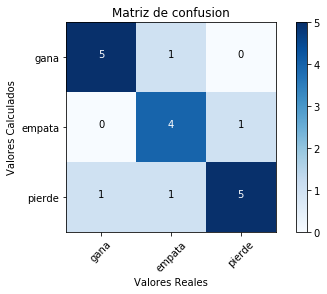

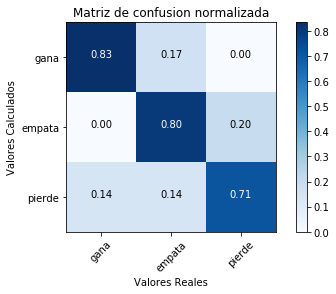

In [18]:
def conf_matr(values, y, y2):
    mat = np.zeros((3,3), dtype=int)
    for i in range(len(y)):
        mat[y[i]][y2[i]]+=1    
    names=['gana', 'empata', 'pierde']
    mpl.figure()
    plot_confusion_matrix(mat, classes=names,
                          title='Matriz de confusion')
    mpl.figure()
    plot_confusion_matrix(mat, classes=names, normalize=True,
                          title='Matriz de confusion normalizada')
    
conf_matr([0,1,2], y, y_values_calc)